# House Prices : Advanced Regression Techniques(Part 2)
- Predict sales prices

## Data Dictonary

### variable

In [76]:
text = open('data_description.txt', mode = 'r').read()
print(text)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data Exploration

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 80)

%matplotlib inline

In [78]:
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

In [79]:
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,14,4,65.0,8450,1,3,1,3,4,1,12,1,1,1,4,7,5,NaN,2,5,7,12,10,1,196.0,2,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,3,4,80.0,9600,1,3,1,3,3,1,20,3,1,1,3,6,8,NaN,2,5,7,5,4,2,0.0,3,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,14,4,68.0,11250,1,3,3,3,4,1,12,1,1,1,4,7,5,NaN,3,5,7,12,10,1,162.0,2,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,0,4,60.0,9550,1,3,3,3,1,1,21,1,1,1,4,7,5,NaN,1,5,7,14,13,2,0.0,3,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,14,4,84.0,14260,1,3,3,3,3,1,1,1,1,1,4,8,5,NaN,2,5,7,12,10,1,350.0,2,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,3,5,80.0,11622,1,3,1,3,4,1,24,3,1,1,3,5,6,NaN,0,5,7,12,10,2,0.0,3,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1,1462,3,4,81.0,14267,1,3,3,3,1,1,24,1,1,1,3,6,6,NaN,0,1,7,14,15,1,108.0,3,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,2,1463,14,4,74.0,13830,1,3,3,3,4,1,14,1,1,1,4,5,5,NaN,3,5,7,12,10,2,0.0,3,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,3,1464,14,4,78.0,9978,1,3,3,3,4,1,14,1,1,1,4,6,6,NaN,3,5,7,12,10,1,20.0,3,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,4,1465,13,4,43.0,5005,1,3,3,1,4,1,8,1,1,2,3,8,5,NaN,2,5,7,4,2,2,0.0,2,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [81]:
train.drop(train.columns[0], axis = 1, inplace = True)
test.drop(test.columns[0], axis = 1, inplace = True)

## Feature Engineering

In [82]:
train_raw = pd.read_csv('train.csv')
test_raw = pd.read_csv('test.csv')
train_test_data = [train, test]

In [83]:
train_test_data[0].head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,14,4,65.0,8450,1,3,1,3,4,1,12,1,1,1,4,7,5,NaN,2,5,7,12,10,1,196.0,2,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,3,4,80.0,9600,1,3,1,3,3,1,20,3,1,1,3,6,8,NaN,2,5,7,5,4,2,0.0,3,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,14,4,68.0,11250,1,3,3,3,4,1,12,1,1,1,4,7,5,NaN,3,5,7,12,10,1,162.0,2,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,0,4,60.0,9550,1,3,3,3,1,1,21,1,1,1,4,7,5,NaN,1,5,7,14,13,2,0.0,3,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,14,4,84.0,14260,1,3,3,3,3,1,1,1,1,1,4,8,5,NaN,2,5,7,12,10,1,350.0,2,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 0. Functions

In [84]:
def chart_bar(feature):
    ax = train[[feature, 'SalePrice']].groupby(feature).mean().plot(kind = 'bar', figsize = (20,5), title = feature)
    ax.title.set_size(20)
    ax.set_xlabel(feature, fontsize = 20)
    ax.set_ylabel('Price', fontsize = 20)

In [85]:
def train_test_info(feature, **options):
    print('Information of {}'.format(feature), '\n')
    for data, a in zip(train_test_data, ['Train', 'Test']):
        print(a)
        print('Number of null : ', data[feature].isnull().sum())
        print('Number of value unique : ', len(data[feature].unique()))
        if options.get('sort') == True:
            print('Kind of value unique : ', np.sort(data[feature].unique()))
        elif options.get('cut') == True:
            print('Kind of value unique : ----')
        else:
            print('Kind of value unique : ', data[feature].unique())
        print('\n')

In [86]:
def mapping(feature):
    uni1 = set(train_raw[feature].unique())
    uni2 = set(test_raw[feature].unique())
    feature_mapping = {}
    uni = uni1.union(uni2)
    for index, i in zip(uni, range(len(uni))):
        feature_mapping.update({index : i})
    for data in train_test_data:
        data[feature] = data[feature].map(feature_mapping)
    train_test_info(feature)
    return feature_mapping

### 28. ExterCond
Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [87]:
train_test_info('ExterCond')

Information of ExterCond 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']




In [88]:
mapping('ExterCond')

Information of ExterCond 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [0 1 2 3 4]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [0 1 2 3 4]




{'Ex': 4, 'Fa': 2, 'Gd': 1, 'Po': 3, 'TA': 0}

### 29. Foundation
Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [89]:
train_test_info('Foundation')

Information of Foundation 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  ['CBlock' 'PConc' 'BrkTil' 'Stone' 'Slab' 'Wood']




In [90]:
mapping('Foundation')

Information of Foundation 

Train
Number of null :  0
Number of value unique :  6
Kind of value unique :  [3 5 2 0 4 1]


Test
Number of null :  0
Number of value unique :  6
Kind of value unique :  [5 3 2 1 4 0]




{'BrkTil': 2, 'CBlock': 5, 'PConc': 3, 'Slab': 4, 'Stone': 1, 'Wood': 0}

### 30. BsmtQual
Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [91]:
train_test_info('BsmtQual')

Information of BsmtQual 

Train
Number of null :  37
Number of value unique :  5
Kind of value unique :  ['Gd' 'TA' 'Ex' nan 'Fa']


Test
Number of null :  44
Number of value unique :  5
Kind of value unique :  ['TA' 'Gd' 'Ex' 'Fa' nan]




### 30-1. Fill NaN

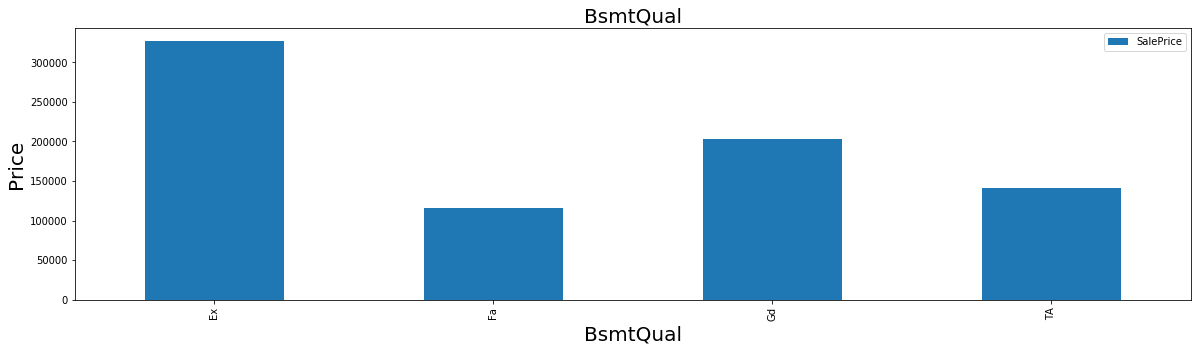

In [92]:
chart_bar('BsmtQual')

In [93]:
mapping('BsmtQual')

Information of BsmtQual 

Train
Number of null :  0
Number of value unique :  5
Kind of value unique :  [2 0 4 1 3]


Test
Number of null :  0
Number of value unique :  5
Kind of value unique :  [0 2 4 3 1]




{'TA': 0, nan: 1, 'Gd': 2, 'Fa': 3, 'Ex': 4}

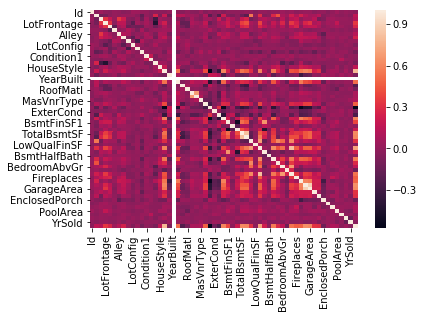

In [94]:
df1 = train.corr()
plt.figure()
sns.heatmap(df1)

In [95]:
df1['BsmtQual'].sort_values(ascending = False).iloc[1:].head()

OverallQual     0.599639
SalePrice       0.593734
GarageYrBlt     0.590465
GarageCars      0.502547
YearRemodAdd    0.496124
Name: BsmtQual, dtype: float64

In [96]:
train[['YearBuilt', 'BsmtQual']].groupby(['YearBuilt', 'BsmtQual']).size().unstack().plot(kind = 'bar', figsize = (20,5), stacked = True)

TypeError: Empty 'DataFrame': no numeric data to plot

### 30-2. mapping

In [ ]:
train.loc[(train['YearBuilt'] == 0) & (train['BsmtQual'] == 1), 'BsmtQual'] = 2
train.loc[(train['YearBuilt'] == 1) & (train['BsmtQual'] == 1), 'BsmtQual'] = 2
train.loc[(train['YearBuilt'] == 2) & (train['BsmtQual'] == 1), 'BsmtQual'] = 2
train.loc[(train['YearBuilt'] == 3) & (train['BsmtQual'] == 1), 'BsmtQual'] = 3
train.loc[(train['YearBuilt'] == 4) & (train['BsmtQual'] == 1), 'BsmtQual'] = 3
train.loc[(train['YearBuilt'] == 5) & (train['BsmtQual'] == 1), 'BsmtQual'] = 3
train.loc[(train['YearBuilt'] == 6) & (train['BsmtQual'] == 1), 'BsmtQual'] = 3
train.loc[(train['YearBuilt'] == 7) & (train['BsmtQual'] == 1), 'BsmtQual'] = 2
train.loc[(train['YearBuilt'] == 8) & (train['BsmtQual'] == 1), 'BsmtQual'] = 4
train.loc[(train['YearBuilt'] == 9) & (train['BsmtQual'] == 1), 'BsmtQual'] = 4

In [ ]:
test.loc[(test['YearBuilt'] == 0) & (test['BsmtQual'] == 1), 'BsmtQual'] = 2
test.loc[(test['YearBuilt'] == 1) & (test['BsmtQual'] == 1), 'BsmtQual'] = 2
test.loc[(test['YearBuilt'] == 2) & (test['BsmtQual'] == 1), 'BsmtQual'] = 2
test.loc[(test['YearBuilt'] == 3) & (test['BsmtQual'] == 1), 'BsmtQual'] = 3
test.loc[(test['YearBuilt'] == 4) & (test['BsmtQual'] == 1), 'BsmtQual'] = 3
test.loc[(test['YearBuilt'] == 5) & (test['BsmtQual'] == 1), 'BsmtQual'] = 3
test.loc[(test['YearBuilt'] == 6) & (test['BsmtQual'] == 1), 'BsmtQual'] = 3
test.loc[(test['YearBuilt'] == 7) & (test['BsmtQual'] == 1), 'BsmtQual'] = 2
test.loc[(test['YearBuilt'] == 8) & (test['BsmtQual'] == 1), 'BsmtQual'] = 4
test.loc[(test['YearBuilt'] == 9) & (test['BsmtQual'] == 1), 'BsmtQual'] = 5

In [ ]:
train_test_info('BsmtQual')

In [75]:
test[test['BsmtQual'] == 1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
757,2218,0,5,60.0,5280,1,3,3,2,2,0,8,3,4,1,6,4,7,2.196429,0,2,4,2,2,3,0.0,0,0,1,1,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA,Ex,N,SBrkr,825,536,0,1361,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1895.0,Unf,1.0,185.0,Fa,TA,Y,0,123,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


		
31BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
32BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
33BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
34BsmtFinSF1: Type 1 finished square feet

35BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)